In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [2]:
data = yf.download(["AAPL", "GOOG", "BAS.DE", "BMW.DE", "RWE.DE", "DBK.DE"], start = "2010-01-01", end = "2020-12-31")

[*********************100%***********************]  6 of 6 completed


In [3]:
data.head()

Adj Close                                                         \
                AAPL     BAS.DE     BMW.DE     DBK.DE       GOOG     RWE.DE   
Date                                                                          
2009-12-31  6.426000        NaN        NaN        NaN  15.441621        NaN   
2010-01-04  6.526020  24.106211  19.280516  32.229897  15.610239  39.131069   
2010-01-05  6.537304  23.740723  19.436930  32.749935  15.541497  38.881390   
2010-01-06  6.433317  23.891222  19.737717  32.407478  15.149715  38.807625   
2010-01-07  6.421426  23.732662  19.912174  32.553337  14.797037  38.643063   

               Close                                   ...       Open  \
                AAPL     BAS.DE     BMW.DE     DBK.DE  ...     BMW.DE   
Date                                                   ...              
2009-12-31  7.526071        NaN        NaN        NaN  ...        NaN   
2010-01-04  7.643214  44.849998  32.049999  39.474529  ...  31.820000   
2010-01-05  7.656429  44.169998  32.310001  40.111465  ...  31.959999   
2010-01-06  7.534643  44.450001  32.810001  39.692020  ...  32.450001   
2010-01-07  7.520714  44.154999  33.099998  39.870674  ...  32.650002   

                                                  Volume             \
               DBK.DE       GOOG     RWE.DE         AAPL     BAS.DE   
Date                                                                  
2009-12-31        NaN  15.560426        NaN  352410800.0        NaN   
2010-01-04  38.837593  15.615220  68.222816  493729600.0  3245626.0   
2010-01-05  39.381317  15.620949  68.770988  601904800.0  3292371.0   
2010-01-06  39.909512  15.588072  68.202881  552160000.0  2345128.0   
2010-01-07  39.381317  15.178109  67.923813  477131200.0  2505352.0   

                                                          
               BMW.DE     DBK.DE         GOOG     RWE.DE  
Date                                                      
2009-12-31        NaN        NaN   48974884.0        NaN  
2010-01-04  1808170.0  4425924.0   78541293.0  2022078.0  
2010-01-05  1564182.0  5950810.0  120638494.0  2040667.0  
2010-01-06  2218604.0  5818935.0  159744526.0  1535087.0  
2010-01-07  2026145.0  4506202.0  257533695.0  1765257.0  

[5 rows x 36 columns]

In [4]:
data = data["Adj Close"]

In [5]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
Date,,,,,,
2009-12-31,6.426000,NaN,NaN,NaN,15.441621,NaN
2010-01-04,6.526020,24.106211,19.280516,32.229897,15.610239,39.131069
2010-01-05,6.537304,23.740723,19.436930,32.749935,15.541497,38.881390
2010-01-06,6.433317,23.891222,19.737717,32.407478,15.149715,38.807625
2010-01-07,6.421426,23.732662,19.912174,32.553337,14.797037,38.643063


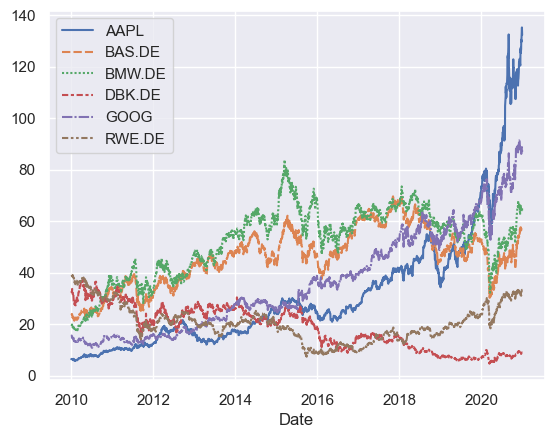

In [6]:
sns.lineplot(data = data);

In [7]:
data = pd.DataFrame(np.diff(np.log(data[1:]), axis=0) * 100, columns=data.columns)

In [8]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
0,0.172764,-1.527768,0.807981,1.600650,-0.441336,-0.640104
1,-1.603469,0.631928,1.535651,-1.051177,-2.553194,-0.189898
2,-0.184997,-0.665886,0.879996,0.449068,-2.355478,-0.424948
3,0.662617,-0.306188,-1.353533,3.578310,1.324303,-0.146948
4,-0.886047,-1.119392,-1.496348,-1.210307,-0.151272,1.169614


In [9]:
data = data.dropna(axis=0)

In [10]:
for i in range(0, data.shape[1]):
    data.iloc[:, i] = data.iloc[:, i][data.iloc[:, i].between(data.iloc[:, i].quantile(0.05), data.iloc[:, i].quantile(0.95))]

In [11]:
data = data.dropna(axis = 0)

In [12]:
data.head()

,AAPL,BAS.DE,BMW.DE,DBK.DE,GOOG,RWE.DE
0,0.172764,-1.527768,0.807981,1.600650,-0.441336,-0.640104
2,-0.184997,-0.665886,0.879996,0.449068,-2.355478,-0.424948
3,0.662617,-0.306188,-1.353533,3.578310,1.324303,-0.146948
4,-0.886047,-1.119392,-1.496348,-1.210307,-0.151272,1.169614
6,1.400682,0.936543,0.606441,-1.693950,-0.575764,-0.220508


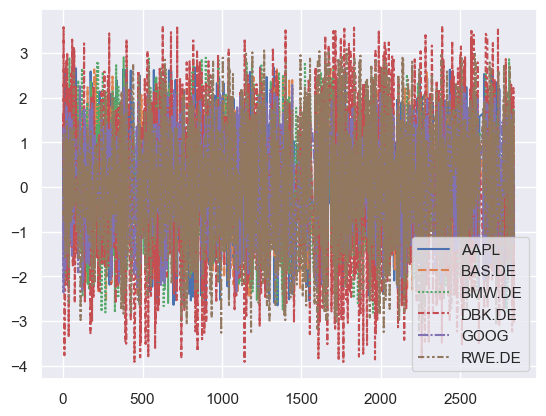

In [13]:
sns.lineplot(data = data);

<AxesSubplot:ylabel='AAPL'>

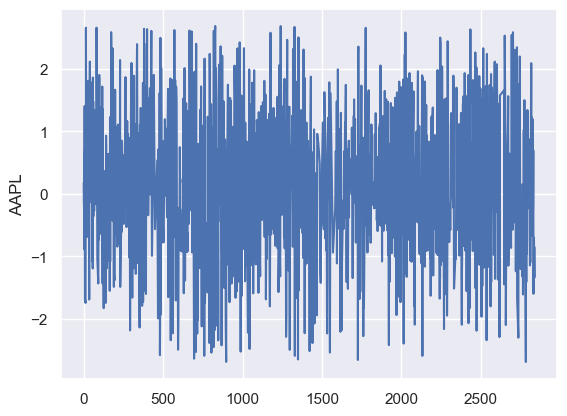

In [14]:
sns.lineplot(data = data.AAPL)

In [15]:
m, n = data.shape

In [16]:
mu = np.mean(data)
Cov = np.cov(data, rowvar=0)
C1 = np.linalg.inv(Cov)

c:\Users\morit\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [17]:
a = mu.T.dot(C1).dot(mu)
b = np.ones([1,n]).dot(C1).dot(mu)
d = np.ones([1,n]).dot(C1).dot(np.ones([n,1]))

In [18]:
n_PFs = 100

In [19]:
w = np.random.random([n_PFs,n])


In [20]:
for i in range(0, n_PFs):
    w[i] = w[i] / w[i].sum()

In [21]:
w[0][0]*data.AAPL[:]

0       0.004185
2      -0.004481
3       0.016050
4      -0.021461
6       0.033927
          ...   
2830    0.016808
2831   -0.038700
2834   -0.016956
2837   -0.032467
2838   -0.020741
Name: AAPL, Length: 1692, dtype: float64

In [22]:
w[0][0]*data.iloc[:,0]

0       0.004185
2      -0.004481
3       0.016050
4      -0.021461
6       0.033927
          ...   
2830    0.016808
2831   -0.038700
2834   -0.016956
2837   -0.032467
2838   -0.020741
Name: AAPL, Length: 1692, dtype: float64

In [23]:
w[0][0]

0.024221429756062614

In [24]:
0.085 * 0.172

0.01462

In [59]:
np.mean(w[1] * data.iloc[1])

-0.0898552335724243

In [32]:
PFReturns = np.empty(shape = (m, n_PFs))

In [47]:
for i in range(0, m):#n_PFs
    for j in range(0, n_PFs):#m
        PFReturns[i,j] = np.mean(w[j] * data.iloc[i])
        #print(i,j)


In [75]:
returns_mean = PFReturns.mean(axis=0)
returns_std = PFReturns.std(axis = 0)

In [76]:
results = pd.DataFrame([returns_mean, returns_std]).T


In [77]:
results.columns = ["mean", "std"]

In [78]:
results.head()

,mean,std
0,0.008459,0.121776
1,0.013588,0.115542
2,0.007957,0.123779
3,0.006902,0.131414
4,0.008704,0.121180


In [79]:
results.shape

(100, 2)

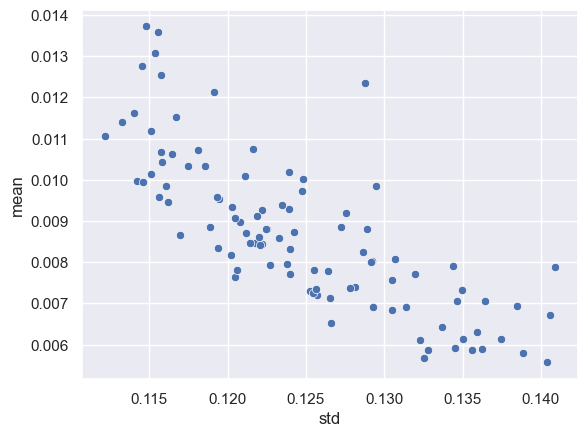

In [80]:
sns.scatterplot(y = results["mean"], x = results["std"]);